In [ ]:
import os
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from tensorflow import keras
import seaborn as sns
import random
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [6]:
def find_max_wave_height(zdisp_window):
    zero_crossings = np.where(np.diff(np.sign(zdisp_window)))[0]
    zero_crossings= np.append(zero_crossings, len(zdisp_window)-1);
    zero_crossings= np.append(-1,zero_crossings)
    h_wave=np.zeros(len(zero_crossings)-1)
    t_wave=np.zeros(len(zero_crossings)-1)
            
    for iter_zero_crossing in range(len(zero_crossings)-1):
        peak_idx=np.argmax(np.abs(zdisp_window[zero_crossings[iter_zero_crossing]+1:zero_crossings[iter_zero_crossing+1]+1]))
        h_wave[iter_zero_crossing]=zdisp_window[zero_crossings[iter_zero_crossing]+1+peak_idx]
        t_wave[iter_zero_crossing]=zero_crossings[iter_zero_crossing]+1+peak_idx
                
    max_wave_height=max(np.abs(np.diff(h_wave)))
    max_index = int(t_wave[np.argmax(np.abs(np.diff(h_wave)))])
    
    return max_wave_height, max_index

In [7]:
def populate_rw_arrays(dir, array, start_idx, end_idx):
    for folder in os.listdir(dir):
        print("Processing: " + folder)
        
        start_time = time.time()
        for file in os.listdir(dir+ "/" + folder):
            if file.endswith(".npz"):
                data=np.load(dir+"/"+ folder+"/"+file)
                z_tmp=data['zdisp'][start_idx:end_idx]
                #print(z_tmp.shape)
                significant_wave_height=4*np.std(data['zdisp'])#[start_idx:-1]
                #if folder=='Buoy_067':
                #    z_disp_rw_buoy_067.append(z_tmp/significant_wave_height)
                #else:
               # z_disp_rw.append(z_tmp/significant_wave_height) 
                z_disp_rw.append(z_tmp/significant_wave_height)
                #print(z_disp_rw[0].shape)
        print("--- %s seconds ---" % (time.time() - start_time))
    return

In [8]:
def populate_norw_arrays(dir, array, end_idx):
    for folder in os.listdir(dir):
        print("Processing: " + folder)
        
        start_time = time.time()
        for file in os.listdir(dir+ "/" + folder):
            if file.endswith(".npz"):
                data=np.load(dir+"/"+ folder+"/"+file)
                z_tmp=data['zdisp_norw'][0:end_idx]
                #print(z_tmp.shape)
                significant_wave_height=4*np.std(data['zdisp_norw'])#[start_idx:-1]
                #if folder=='Buoy_067':
                #    z_disp_rw_buoy_067.append(z_tmp/significant_wave_height)
                #else:
               # z_disp_rw.append(z_tmp/significant_wave_height) 
                z_disp_norw.append(z_tmp/significant_wave_height)

        print("--- %s seconds ---" % (time.time() - start_time))
    return          

In [10]:
#num_samples_each_type = int(input("Enter the number of each type of wave sample: ")) 
#num_samples_each_type = 50000 

root_folder_rw = os.getcwd()+"/wave_height_g_2"
root_folder_norw = os.getcwd()+"/wave_height_g_2"

#root_folder="E:/"

window_start_min_rel_to_rw=-25
window_length_in_min=15

samplerate=1.28

rw_idx=round(25*60*samplerate)
start_idx=round((25+window_start_min_rel_to_rw)*60*samplerate)
end_idx=start_idx+round(window_length_in_min*60*samplerate)

rw_dir=root_folder_rw + '/rw_samples'
z_disp_rw=[] 
#z_disp_rw_buoy_067=[] 
populate_rw_arrays(rw_dir, z_disp_rw, start_idx, end_idx)

z_disp_norw=[]
#z_disp_norw_buoy_067=[]
norw_dir=root_folder_norw + '/norw_samples'
#norw_dir=root_folder_norw 
end_idx=end_idx-start_idx
populate_norw_arrays(norw_dir, z_disp_norw, end_idx)

Processing: Buoy_028
--- 3.034674644470215 seconds ---
Processing: Buoy_029
--- 5.280642032623291 seconds ---
Processing: Buoy_036
--- 5.619587659835815 seconds ---
Processing: Buoy_043
--- 1.873417854309082 seconds ---
Processing: Buoy_045
--- 3.5694007873535156 seconds ---
Processing: Buoy_067
--- 3.640397548675537 seconds ---
Processing: Buoy_071
--- 4.353197336196899 seconds ---
Processing: Buoy_076
--- 4.487294435501099 seconds ---
Processing: Buoy_081
--- 0.0009982585906982422 seconds ---
Processing: Buoy_087
--- 0.00016927719116210938 seconds ---
Processing: Buoy_088
--- 0.0 seconds ---
Processing: Buoy_089
--- 0.0 seconds ---
Processing: Buoy_090
--- 0.0 seconds ---
Processing: Buoy_091
--- 0.4673426151275635 seconds ---
Processing: Buoy_092
--- 4.3126444816589355 seconds ---
Processing: Buoy_093
--- 1.6205401420593262 seconds ---
Processing: Buoy_094
--- 3.652235507965088 seconds ---
Processing: Buoy_095
--- 0.9433732032775879 seconds ---
Processing: Buoy_096
--- 2.40667700767

In [11]:
z_disp_rw=np.vstack(z_disp_rw)
#z_disp_rw_buoy_067=np.vstack(z_disp_rw_buoy_067)
print(z_disp_rw.shape)

z_disp_norw=np.vstack(z_disp_norw)
#z_disp_norw_buoy_067=np.vstack(z_disp_norw_buoy_067)

print(z_disp_norw.shape)

(169961, 1152)
(169961, 1152)


In [12]:
possible_total_waves = round(z_disp_rw.shape[0] + z_disp_norw.shape[0])
print(f"Total possible waves in our study: {possible_total_waves}")

Total possible waves in our study: 339922


The number of rogue wave samples in the case with relative rogue wave ratio 0.2 is 42490.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.2 is 169961.
The total number of wave samples in the case with relative rogue wave ratio 0.2 is 212451.
(42490, 1152)
(169961, 1152)


59770
169550
92946


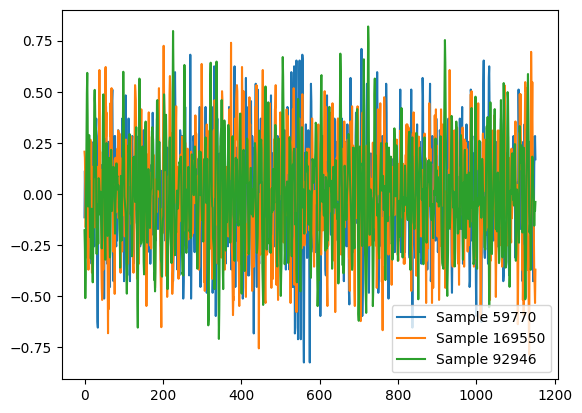

The number of rogue wave samples in the case with relative rogue wave ratio 0.3 is 72840.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.3 is 169961.
The total number of wave samples in the case with relative rogue wave ratio 0.3 is 242801.
(72840, 1152)
(169961, 1152)


106923
65373
97518


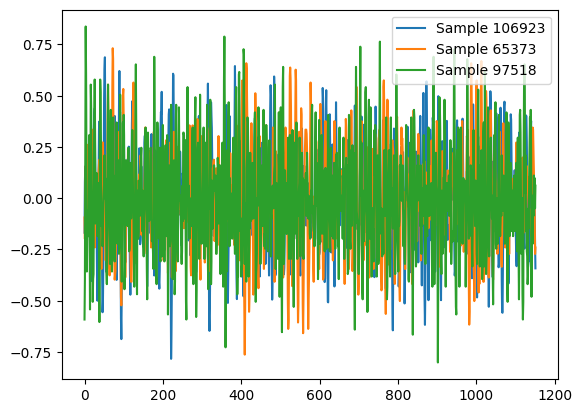

The number of rogue wave samples in the case with relative rogue wave ratio 0.4 is 113307.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.4 is 169961.
The total number of wave samples in the case with relative rogue wave ratio 0.4 is 283268.
(113307, 1152)
(169961, 1152)


116155
138622
25675


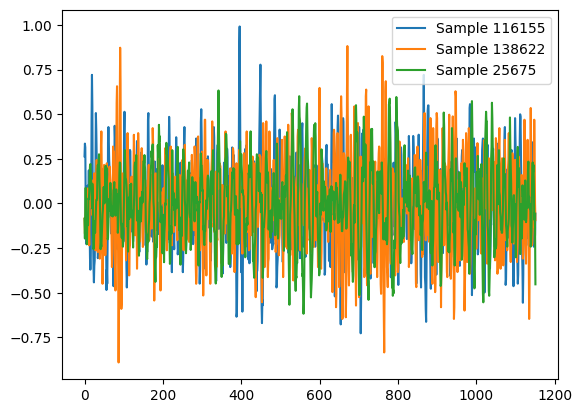

The number of rogue wave samples in the case with relative rogue wave ratio 0.5 is 169961.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.5 is 169961.
The total number of wave samples in the case with relative rogue wave ratio 0.5 is 339922.
(169961, 1152)
(169961, 1152)


103439
133138
51349


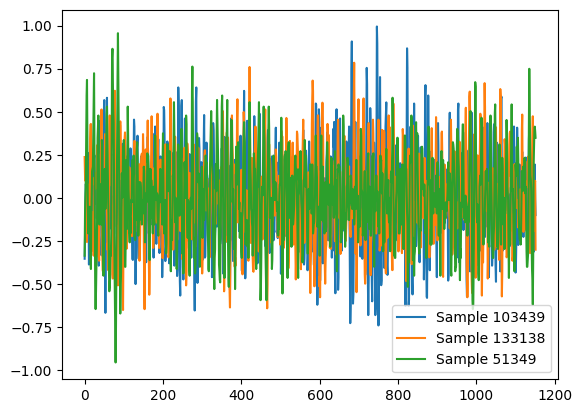

The number of rogue wave samples in the case with relative rogue wave ratio 0.6 is 169961.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.6 is 113307.
The total number of wave samples in the case with relative rogue wave ratio 0.6 is 283268.
(169961, 1152)
(113307, 1152)


107017
7112
42424


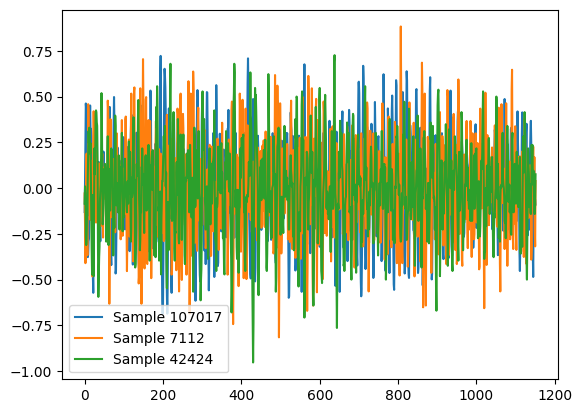

The number of rogue wave samples in the case with relative rogue wave ratio 0.7 is 169961.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.7 is 72840.
The total number of wave samples in the case with relative rogue wave ratio 0.7 is 242801.
(169961, 1152)
(72840, 1152)


13993
9462
101828


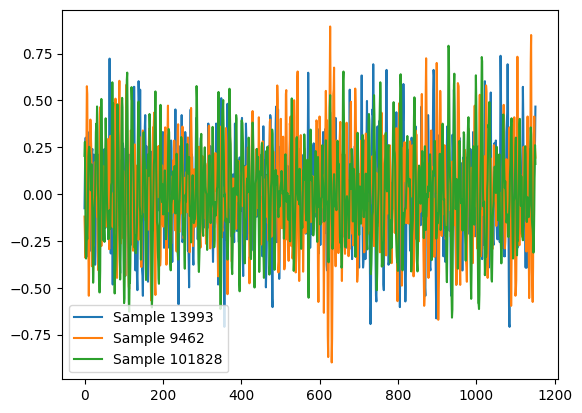

The number of rogue wave samples in the case with relative rogue wave ratio 0.8 is 169961.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.8 is 42490.
The total number of wave samples in the case with relative rogue wave ratio 0.8 is 212451.
(169961, 1152)
(42490, 1152)


42216
49723
7030


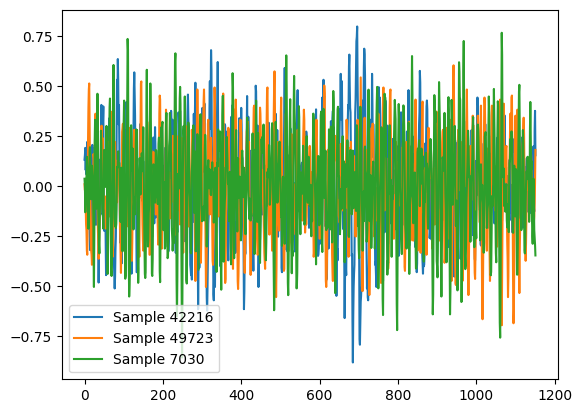

In [14]:
import matplotlib.pyplot as plt
N_data=min([z_disp_rw.shape[0],z_disp_norw.shape[0]])#-1#-110001  #-1
relative_rw = [0.2, 0.3, 0.4, 0.5, 0.6 ,0.7, 0.8]

for i in range(len(relative_rw)):
    ratio = relative_rw[i]
    if ratio >= 0.5:
        num_rw = z_disp_rw.shape[0]
        num_norw = round(((1-ratio)/ratio) * num_rw)
    else:
        num_norw = z_disp_norw.shape[0]
        num_rw = round((ratio / (1-ratio))*num_norw)

    print(f"The number of rogue wave samples in the case with relative rogue wave ratio {ratio} is {num_rw}.")
    print(f"The number of non-rogue wave samples in the case with relative rogue wave ratio {ratio} is {num_norw}.")
    print(f"The total number of wave samples in the case with relative rogue wave ratio {ratio} is {num_rw + num_norw}.", end='\n') 
        
    z_disp_rw_altered = z_disp_rw[0:num_rw]
    z_disp_norw_altered = z_disp_norw[0:num_norw]
    
    print(z_disp_rw_altered.shape)
    print(z_disp_norw_altered.shape)
    print('\n')

    N_plots=3
    selected_samples=random.sample(range(0, len(z_disp_rw)), N_plots)

    plt.figure()
    for iter_plot in selected_samples:
        print(iter_plot)
        plt.plot(z_disp_rw[iter_plot,:], label='Sample '+str(iter_plot))

    plt.legend(loc='best')    
    plt.show()
    plt.close()

    wave_data=np.concatenate((z_disp_rw_altered, z_disp_norw_altered), axis=0)
    labels=np.concatenate(( np.ones(len(z_disp_rw_altered)) , np.zeros(len(z_disp_norw_altered))),axis=0)

    #wave_data_buoy_067=np.concatenate((z_disp_rw_buoy_067, z_disp_norw_buoy_067), axis=0)
    #labels_067=np.concatenate(( np.ones(len(z_disp_rw_buoy_067)) , np.zeros(len(z_disp_norw_buoy_067))),axis=0)

    idx = np.random.permutation(len(wave_data))
    wave_data = wave_data[idx]
    labels=labels[idx]


    wave_data_train=wave_data[0:round(0.8*len(wave_data))]
    wave_data_test=wave_data[round(0.8*len(wave_data))+1:]                                      

    label_train=labels[0:round(0.8*len(wave_data))]
    label_test=labels[round(0.8*len(wave_data))+1:]


    wave_data_train = wave_data_train.reshape((wave_data_train.shape[0], wave_data_train.shape[1], 1))
    wave_data_test = wave_data_test.reshape((wave_data_test.shape[0], wave_data_test.shape[1], 1))

    num_classes=2

    np.savez(os.getcwd()  +f'/DataPrepared/RWs_H_g_2_tadv_10min_rw_smallWindow_{ratio}',wave_data_train=wave_data_train, wave_data_test=wave_data_test,label_train=label_train,label_test=label_test)

In [9]:
# np.random.seed(5)
# num_labels = 35000
# len_array_rw = len(z_disp_rw)
# len_array_norw = len(z_disp_norw)

# indices_rw = np.random.choice(len_array_rw, num_labels, replace=False)
# indices_norw = np.random.choice(len_array_norw, num_labels, replace=False)

# z_disp_rw_modified = z_disp_rw[indices_rw]
# z_disp_norw_modified = z_disp_norw[indices_norw]

# print(z_disp_rw_modified.shape)
# print(z_disp_norw_modified.shape)

In [10]:
# possible_total_waves = round(z_disp_rw_modified.shape[0] + z_disp_norw_modified.shape[0])
# print(f"Total possible waves in our study: {possible_total_waves}")

In [11]:
# N_data=min([z_disp_rw_modified.shape[0],z_disp_norw_modified.shape[0]])#-1#-110001  #-1
# relative_rw = [0.2, 0.3, 0.4, 0.5, 0.6 ,0.7, 0.8]

# for i in range(len(relative_rw)):
#     ratio = relative_rw[i]
#     if ratio >= 0.5:
#         num_rw = z_disp_rw_modified.shape[0]
#         num_norw = round(((1-ratio)/ratio) * num_rw)
#     else:
#         num_norw = z_disp_norw_modified.shape[0]
#         num_rw = round((ratio / (1-ratio))*num_norw)

#     print(f"The number of rogue wave samples in the case with relative rogue wave ratio {ratio} is {num_rw}.")
#     print(f"The number of non-rogue wave samples in the case with relative rogue wave ratio {ratio} is {num_norw}.")
#     print(f"The total number of wave samples in the case with relative rogue wave ratio {ratio} is {num_rw + num_norw}.", end='\n') 
        
#     z_disp_rw_altered = z_disp_rw_modified[0:num_rw]
#     z_disp_norw_altered = z_disp_norw_modified[0:num_norw]
    
#     print(z_disp_rw_altered.shape)
#     print(z_disp_norw_altered.shape)
#     print('\n')

#     N_plots=3
#     selected_samples=random.sample(range(0, len(z_disp_rw)), N_plots)

#     plt.figure()
#     for iter_plot in selected_samples:
#         print(iter_plot)
#         plt.plot(z_disp_rw[iter_plot,:], label='Sample '+str(iter_plot))

#     plt.legend(loc='best')    
#     plt.show()
#     plt.close()

#     wave_data=np.concatenate((z_disp_rw_altered, z_disp_norw_altered), axis=0)
#     labels=np.concatenate(( np.ones(len(z_disp_rw_altered)) , np.zeros(len(z_disp_norw_altered))),axis=0)

#     #wave_data_buoy_067=np.concatenate((z_disp_rw_buoy_067, z_disp_norw_buoy_067), axis=0)
#     #labels_067=np.concatenate(( np.ones(len(z_disp_rw_buoy_067)) , np.zeros(len(z_disp_norw_buoy_067))),axis=0)

#     idx = np.random.permutation(len(wave_data))
#     wave_data = wave_data[idx]
#     labels=labels[idx]


#     wave_data_train=wave_data[0:round(0.8*len(wave_data))]
#     wave_data_test=wave_data[round(0.8*len(wave_data))+1:]                                      

#     label_train=labels[0:round(0.8*len(wave_data))]
#     label_test=labels[round(0.8*len(wave_data))+1:]


#     wave_data_train = wave_data_train.reshape((wave_data_train.shape[0], wave_data_train.shape[1], 1))
#     wave_data_test = wave_data_test.reshape((wave_data_test.shape[0], wave_data_test.shape[1], 1))

#     num_classes=2

#     np.savez(os.getcwd()  +f'/DataPrepared/RWs_H_g_2_tadv_10min_rw_modified_smallWindow_{ratio}',wave_data_train=wave_data_train, wave_data_test=wave_data_test,label_train=label_train,label_test=label_test)